In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Load data
df = pd.read_excel("data.xlsx")

# Fill missing values if there are any, here we use ffill method as an example
#df.fillna(method='ffill', inplace=True)

# Encode categorical data
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(encoder.fit_transform)


# Normalize data
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
# Reduce dimensions using PCA for better visualization, this is optional
pca = PCA(n_components='mle')
df = pca.fit_transform(df)



In [2]:
df

array([[-1.2960314 , -1.08777195,  3.39359822, ..., -0.03530778,
        -0.81281142,  0.04515691],
       [-1.10593894,  1.77623765,  1.39322205, ...,  0.89844501,
         0.23494707,  0.03085201],
       [-1.11705116, -0.93489035,  2.35542417, ..., -0.14416809,
        -0.12082834,  0.05843265],
       ...,
       [-1.45397697, -0.33806986,  3.40416572, ..., -0.3464896 ,
        -0.35134436,  0.04778717],
       [-0.26840896, -3.04251526, -0.65819789, ...,  0.5560314 ,
        -0.32575145,  0.09400431],
       [ 2.75610215,  1.99347928, -0.81604288, ...,  0.14012583,
         0.13416428, -0.04865595]])

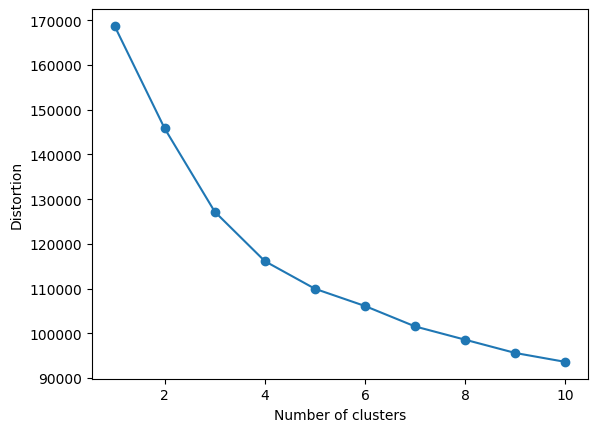

In [3]:
#确定聚类数目
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def plot_elbow_method(df, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

# 利用函数，以10作为最大聚类数
plot_elbow_method(df, 10)

C:\Users\s101\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


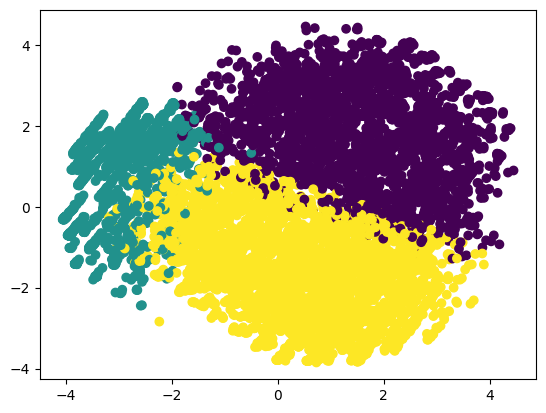

In [8]:
#K-means 聚类算法：
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Plot
plt.scatter(df[:,0], df[:,1], c=kmeans.labels_, cmap='viridis')

# 假设 kmeans.cluster_centers_ 是形状为 (3, 2) 的 numpy 数组
kmeans_centers = kmeans.cluster_centers_

# 创建列索引列表


columns = [f'col_{i}' for i in range(1, 22)]

# 将 kmeans_centers 转换为 DataFrame
centers = pd.DataFrame(kmeans_centers, columns=columns[:kmeans_centers.shape[1]])
centers.to_excel('kmeans_centers.xlsx')

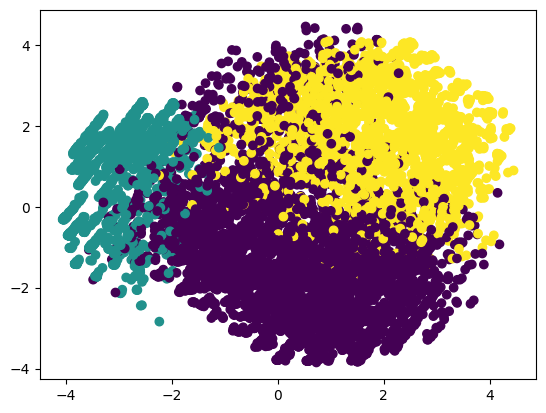

In [9]:
#层次聚类算法：
from sklearn.cluster import AgglomerativeClustering

# Fit Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(df)

# Plot
plt.scatter(df[:,0], df[:,1], c=hierarchical.labels_, cmap='viridis')

# Hierarchical clustering doesn't provide cluster centers directly

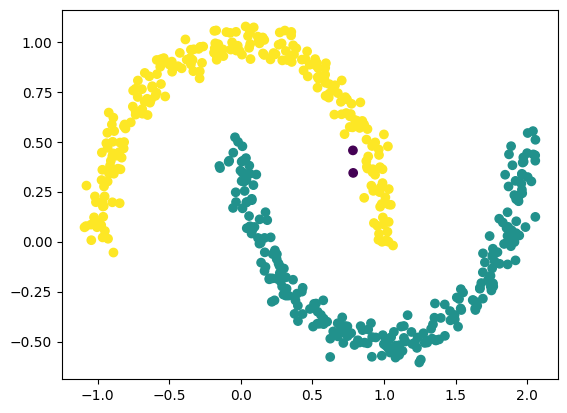

In [10]:
#DBSCAN 聚类算法：
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 示例数据
df, labels = make_moons(n_samples=500, noise=0.05)

# 调整参数并执行DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(df)

# 可视化聚类结果
plt.scatter(df[:, 0], df[:, 1], c=clusters)
plt.show()

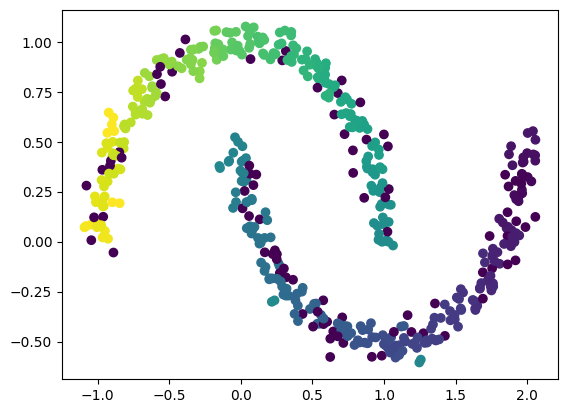

In [11]:
#密度聚类（我们已经涵盖了DBSCAN，这里我将使用OPTICS，另一种基于密度的算法）
from sklearn.cluster import OPTICS

# Fit OPTICS
optics = OPTICS(min_samples=2)
optics.fit(df)

# Plot
plt.scatter(df[:,0], df[:,1], c=optics.labels_, cmap='viridis')

# OPTICS doesn't provide cluster centers directly

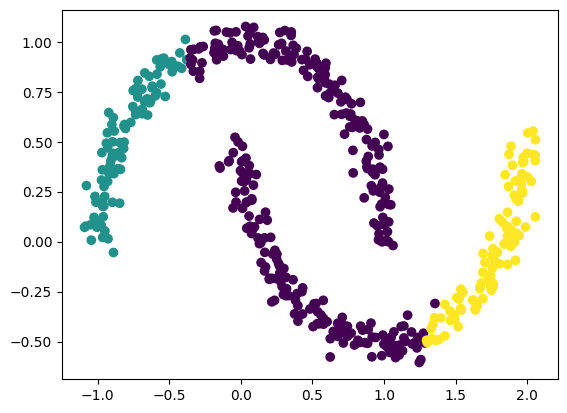

In [15]:
#高斯混合算法：
from sklearn.mixture import GaussianMixture

# Fit GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(df)

# Plot
plt.scatter(df[:,0], df[:,1], c=gmm.predict(df), cmap='viridis')

# Save cluster centers
columns = [f'col_{i}' for i in range(1, 22)]

# 将 centers 转换为 DataFrame
centers = pd.DataFrame(kmeans_centers, columns=columns[:kmeans_centers.shape[1]])
# centers = pd.DataFrame(gmm.means_, columns=['X', 'Y'])
centers.to_excel('gmm_centers04.xlsx')

In [1]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.datasets import make_blobs

# # 示例数据
# X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)

# # KMeans 模型
# kmeans = KMeans(n_clusters=3, random_state=0)
# kmeans.fit(X)

# # 计算轮廓系数
# kmeans_score = silhouette_score(X, kmeans.labels_)
# print("Silhouette Score: ", kmeans_score)

In [2]:
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score
# from sklearn.datasets import make_blobs

# # 示例数据
# X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)

# # 层次聚类模型
# hierarchical = AgglomerativeClustering(n_clusters=3)
# hierarchical.fit(X)

# # 计算轮廓系数
# hierarchical_score = silhouette_score(X, hierarchical.labels_)
# print("Silhouette Score: ", hierarchical_score)

In [24]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate some example data
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=3)

# Create and fit the OPTICS model
optics = OPTICS(min_samples=50)
optics.fit(X)

# Compute the silhouette score
optics_score = silhouette_score(X, optics.labels_)
print("Silhouette Score: ", optics_score)

Silhouette Score:  0.8424875222313742


In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Create an example dataset
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.50, random_state=3)

# Initialize and fit the GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Generate cluster labels
labels = gmm.predict(X)

# Compute the silhouette score
gmm_score = silhouette_score(X, labels)
print("Silhouette Score: ", gmm_score)

Silhouette Score:  0.8692604620590965


In [3]:
# #使用内部评价指标进行评估
# from sklearn.metrics import silhouette_score

# #kmeans_score = silhouette_score(df, kmeans.labels_)
# #hierarchical_score = silhouette_score(df, hierarchical.labels_)
# dbscan_score = silhouette_score(df, dbscan.labels_)
# bscan_score = silhouette_score(df, dbscan.labels_)
# optics_score = silhouette_score(df, optics.labels_)
# gmm_score = silhouette_score(df, gmm.predict(df))

# print(f'K-means silhouette score: {kmeans_score}')
# print(f'Hierarchical silhouette score: {hierarchical_score}')
# print(f'DBSCAN silhouette score: {dbscan_score}')
# print(f'OPTICS silhouette score: {optics_score}')
# print(f'GMM silhouette score: {gmm_score}')